In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#Extract Features with VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [ ]:
model=VGG16(weights='imagenet',include_top=False)
img_path='/content/image1.jpg'

In [ ]:
img= image.load_img(img_path, target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x=preprocess_input(x)
features=model.predict(x)
print(features.shape)
print(features)

(1, 7, 7, 512)
[[[[ 0.          0.          0.         ...  0.          3.4925442
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          2.0427692
     0.        ]
   [ 0.          0.          0.         ...  0.          0.83579034
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     7.224947  ]
   [ 0.          0.          0.         ...  0.          0.
    26.13831   ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.  

#Extract Features from an Arbitrary Intermediate Layer with VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False)
model=Model(inputs=base_model.input,outputs=base_model.get_layer('block4_pool').output)
img_path='/content/image2.jpg'
img= image.load_img(img_path, target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x=preprocess_input(x)
block4_pool_features=model.predict(x)
print(block4_pool_features.shape)
print(block4_pool_features)

(1, 14, 14, 512)
[[[[  0.          0.          0.        ...   0.          0.
    432.62195  ]
   [109.560425    0.          0.        ...  75.92465     0.
    111.964    ]
   [ 76.43828     0.        173.96556   ...   0.          0.
      0.       ]
   ...
   [  0.          0.          0.        ... 189.84587     0.
      2.8362572]
   [  0.          0.          0.        ... 516.1046      0.
      0.       ]
   [  0.         96.15398     0.        ... 608.32623     0.
     83.84566  ]]

  [[  0.          0.          0.        ...   8.970053    0.
    147.2155   ]
   [  0.          0.          0.        ...  98.63738     0.
     76.727844 ]
   [  0.          0.        107.78717   ...   0.          0.
      0.       ]
   ...
   [  0.          0.          0.        ... 238.04433     0.
      0.       ]
   [  0.          0.          0.        ... 569.4078      0.
      0.       ]
   [  0.          0.          0.        ... 694.2222      0.
      0.       ]]

  [[  0.         34.633392   

#Summarize Filters in Each Convolutional Layer of VGG16 Model

In [ ]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
model=VGG16()
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters,biases = layer.get_weights()
  print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


#Visualize First 6 Filters Out of 64 Filters in Second Layer of VGG16 Model

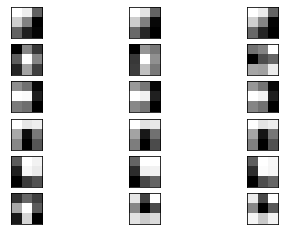

In [ ]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
model=VGG16()
filters,biases =model.layers[1].get_weights()
f_min,f_max=filters.min(),filters.max()
filters=(filters-f_min)/(f_max-f_min)
n_filters, ix = 6,1
for i in range(n_filters):
  f=filters[:, :, :, i]
  for j in range(3):
    ax=pyplot.subplot(n_filters,3,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(f[:, :, j], cmap='gray')
    ix+=1
pyplot.show()

#Summarize Feature Map Size for Each Conv Layer

In [ ]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
model=VGG16()
for i in range(len(model.layers)):
  layer=model.layers[i]
  if 'conv' not in layer.name:
    continue
  print(i,layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


#Visualizing the Feature Map for the First Convolutional Layer in the VGG16 Model for an Input Image

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from numpy import expand_dims
from matplotlib import pyplot

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


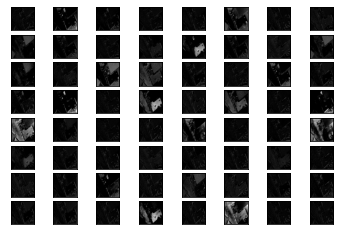

In [ ]:
mode=VGG16()
model=Model(inputs=model.inputs,outputs=model.layers[1].output)
model.summary()
img=load_img('/content/image2.jpg',target_size=(224,224))
img=img_to_array(img)
img=expand_dims(img, axis=0)
img=preprocess_input(img)
square=8
ix=1
for _ in range(square):
  for _ in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    feature_maps=model.predict(img)
    pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
    ix+=1
pyplot.show()